# Titanic - Preparação de Dados para Machine Learning

**Data Dictionary**

| Variable | Definition                                 | Key                                            | Notes                                                                                                                                       |
|----------|--------------------------------------------|------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                |                                                                                                                                             |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      | A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower                                                                |
| sex      | Sex                                        |                                                |                                                                                                                                             |
| Age      | Age in years                               |                                                | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5                                                        |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                | Sibling = brother, sister, stepbrother, stepsister  Spouse = husband, wife (mistresses and fiancés were ignored)                            |
| parch    | # of parents / children aboard the Titanic |                                                | Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them. |
| ticket   | Ticket number                              |                                                |                                                                                                                                             |
| fare     | Passenger fare                             |                                                |                                                                                                                                             |
| cabin    | Cabin number                               |                                                |                                                                                                                                             |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |                                                                                                                                             |

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


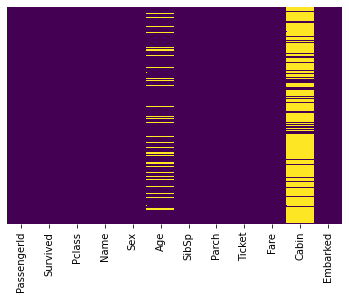

In [ ]:
import seaborn as sns

sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
titanic.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'],axis=1,inplace=True)

In [ ]:
titanic.loc[titanic.Age.isna() & (titanic.Pclass == 1), 'Age'] = titanic[titanic.Pclass == 1].Age.median()
titanic.loc[titanic.Age.isna() & (titanic.Pclass == 2), 'Age'] = titanic[titanic.Pclass == 2].Age.median()
titanic.loc[titanic.Age.isna() & (titanic.Pclass == 3), 'Age'] = titanic[titanic.Pclass == 3].Age.median()

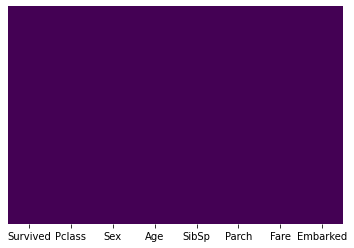

In [ ]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
titanic.dropna(inplace=True)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
sex = pd.get_dummies(titanic['Sex'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
embark = pd.get_dummies(titanic['Embarked'], drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
titanic = pd.concat([titanic,sex,embark],axis=1)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
 8   male      889 non-null    uint8  
 9   Q         889 non-null    uint8  
 10  S         889 non-null    uint8  
dtypes: float64(2), int64(4), object(2), uint8(3)
memory usage: 65.1+ KB


In [ ]:
titanic.drop(['Sex','Embarked'],axis=1,inplace=True)

In [ ]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X = titanic.drop('Survived',axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler  

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()  
scaler.fit(X_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

X_train_scaled[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] = scaler.transform(X_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])  
X_test_scaled[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] = scaler.transform(X_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
X_train_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
486,-1.586317,0.432873,0.420921,-0.484112,1.124776,0,0,1
293,0.814387,-0.382317,-0.488152,-0.484112,-0.468406,0,0,1
173,0.814387,-0.604642,-0.488152,-0.484112,-0.486566,1,0,1
450,-0.385965,0.506981,0.420921,1.934506,-0.097351,1,0,1
361,-0.385965,-0.011776,0.420921,-0.484112,-0.097924,1,0,0


##Criar Modelo KNN e treiná-lo

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

Executar o modelo

In [ ]:
y_train_pred = knn.predict(X_train_scaled)

In [ ]:
knn.score(X_train_scaled, y_train)

0.8842443729903537

In [ ]:
knn.score(X_test_scaled, y_test)

0.7865168539325843

Avaliar o melhor valor de K

Text(0, 0.5, 'Error Rate')

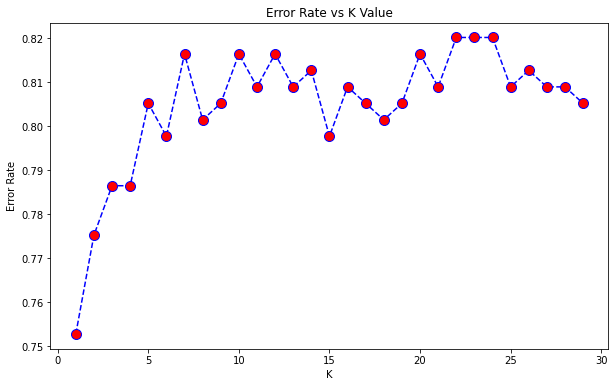

In [ ]:
import numpy as np

score = []

for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled, y_train)
  score.append(knn.score(X_test_scaled, y_test))
  
plt.figure(figsize=(10,6))
plt.plot(range(1,30), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')